In [1]:
import numpy as np 
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df=pd.read_csv('US_Heart_Patients_2.csv')

In [3]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,...,BMI,heartRate,glucose,Heart-Att,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,...,26.97,80.0,77.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,...,28.73,95.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,...,25.34,75.0,70.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,...,28.58,65.0,103.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,...,23.10,85.0,85.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,...,22.00,84.0,86.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,...,19.16,86.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,...,21.47,80.0,107.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,...,25.60,67.0,72.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

In [5]:
df = df.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'])


In [6]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48.0,2.0,1.0,20.0,NaN,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [8]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
education,4130.0,1.98,1.02,1.00,1.00,2.0,3.00,4.0
currentSmoker,4237.0,0.49,0.50,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
BP Meds,4180.0,0.03,0.17,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4231.0,0.01,0.08,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4238.0,0.31,0.46,0.00,0.00,0.0,1.00,1.0
diabetes,4238.0,0.03,0.16,0.00,0.00,0.0,0.00,1.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0


In [10]:
cat = ['education','currentSmoker','BP Meds','prevalentStroke','prevalentHyp','diabetes','Gender']
num = ['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose']

In [11]:
round(df[num].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4209.0,9.00,11.92,0.00,0.00,0.0,20.00,70.0
tot cholesterol,4180.0,236.68,44.62,107.00,206.00,234.0,263.00,696.0
Systolic BP,4236.0,132.36,22.04,83.50,117.00,128.0,144.00,295.0
Diastolic BP,4235.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4216.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4236.0,75.87,12.00,44.00,68.00,75.0,83.00,143.0
glucose,3849.0,81.95,23.96,40.00,71.00,78.0,87.00,394.0


In [12]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [13]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

Num Variable Null Treatment

In [14]:
for i in num:
    df[i].fillna(df[i].mean(),inplace=True)

In [15]:
df.isnull().sum()

Gender               8
age                  0
education          110
currentSmoker        3
cigsPerDay           0
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol      0
Systolic BP          0
Diastolic BP         0
BMI                  0
heartRate            0
glucose              0
Heart-Att            0
dtype: int64

Num Variable Cat Treatment

In [16]:
for i in cat:
    df[i].fillna(df[i].mode,inplace=True)

In [17]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

Box Plot to visulalize the outliers

<Figure size 1600x800 with 0 Axes>

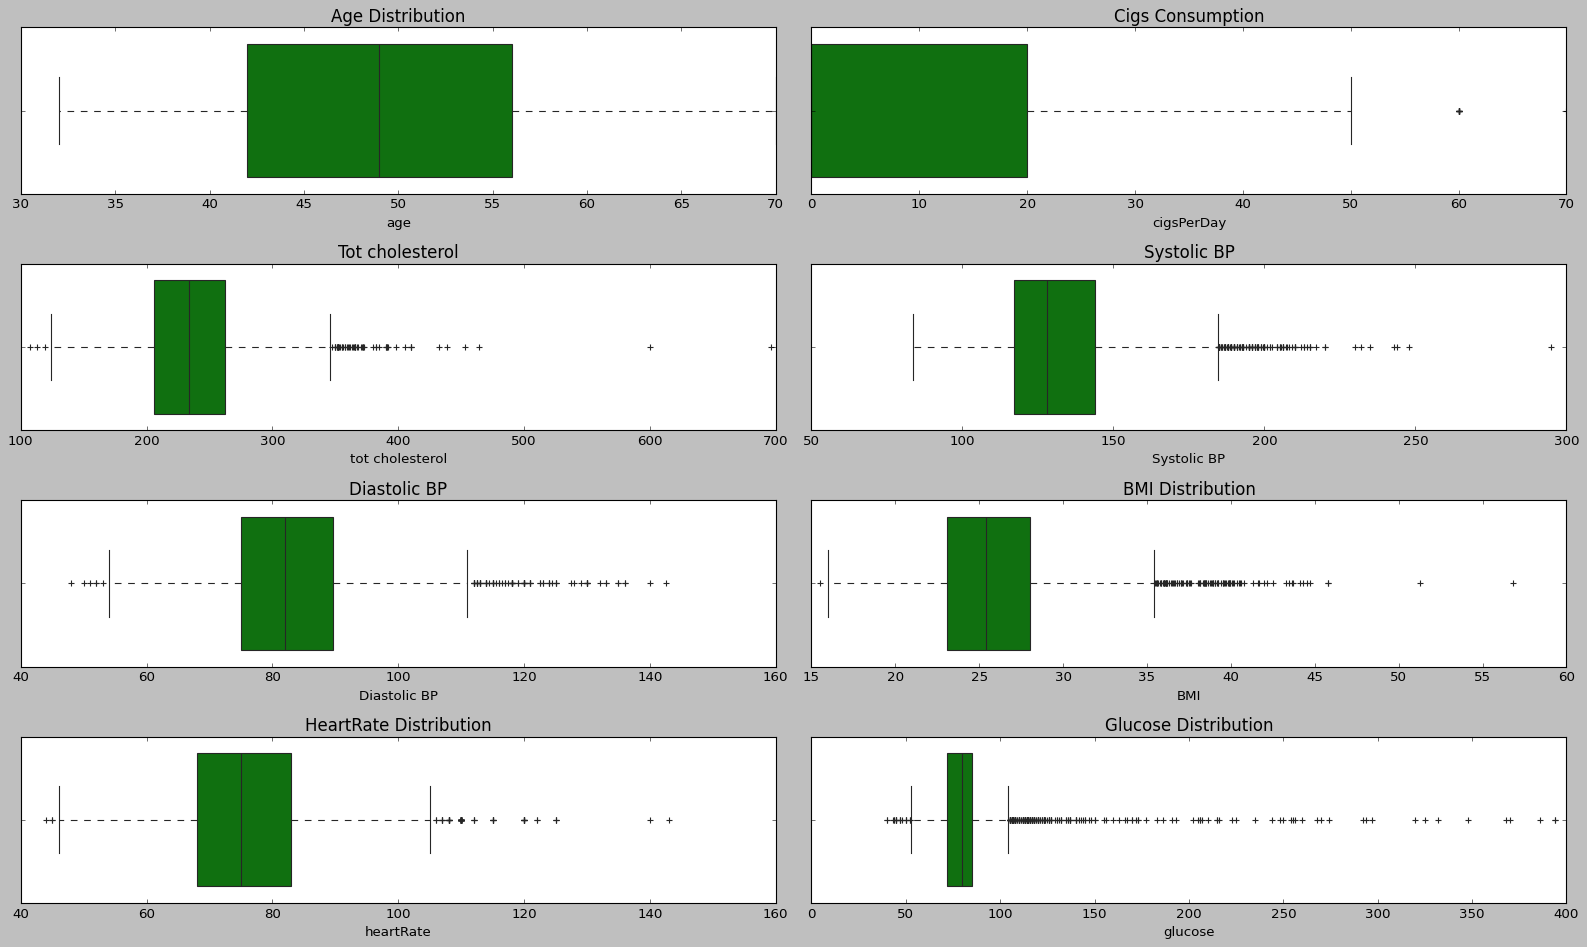

In [18]:
plt.figure(figsize=(20,10));
fig,axes = plt.subplots(nrows = 4, ncols = 2,figsize = (20,12));


a = sns.boxplot(df['age'],orient = 'h',ax = axes[0][0],color= 'Green');
a.set_title('Age Distribution',fontsize  = 15);

a = sns.boxplot(df['cigsPerDay'],orient = 'h',ax = axes[0][1],color= 'Green');
a.set_title('Cigs Consumption',fontsize  = 15);

a = sns.boxplot(df['tot cholesterol'],orient = 'h',ax = axes[1][0],color= 'Green');
a.set_title('Tot cholesterol',fontsize  = 15);

a = sns.boxplot(df['Systolic BP'],orient = 'h',ax = axes[1][1],color= 'Green');
a.set_title('Systolic BP',fontsize  = 15);

a = sns.boxplot(df['Diastolic BP'],orient = 'h',ax = axes[2][0],color= 'Green');
a.set_title('Diastolic BP',fontsize  = 15);

a = sns.boxplot(df['BMI'],orient = 'h',ax = axes[2][1],color= 'Green');
a.set_title('BMI Distribution',fontsize  = 15);

a = sns.boxplot(df['heartRate'],orient = 'h',ax = axes[3][0],color= 'Green');
a.set_title('HeartRate Distribution',fontsize  = 15);

a = sns.boxplot(df['glucose'],orient = 'h',ax = axes[3][1],color= 'Green');
a.set_title('Glucose Distribution',fontsize  = 15);

plt.tight_layout();


In [19]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col,[25,75])
    IQR=Q3-Q1
    upper_bound=Q3+1.5*IQR
    lower_bound=Q3-1.5*IQR
    return upper_bound,lower_bound

In [20]:
remove_outliers(df[['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']])


(np.float64(214.5), np.float64(1.5))

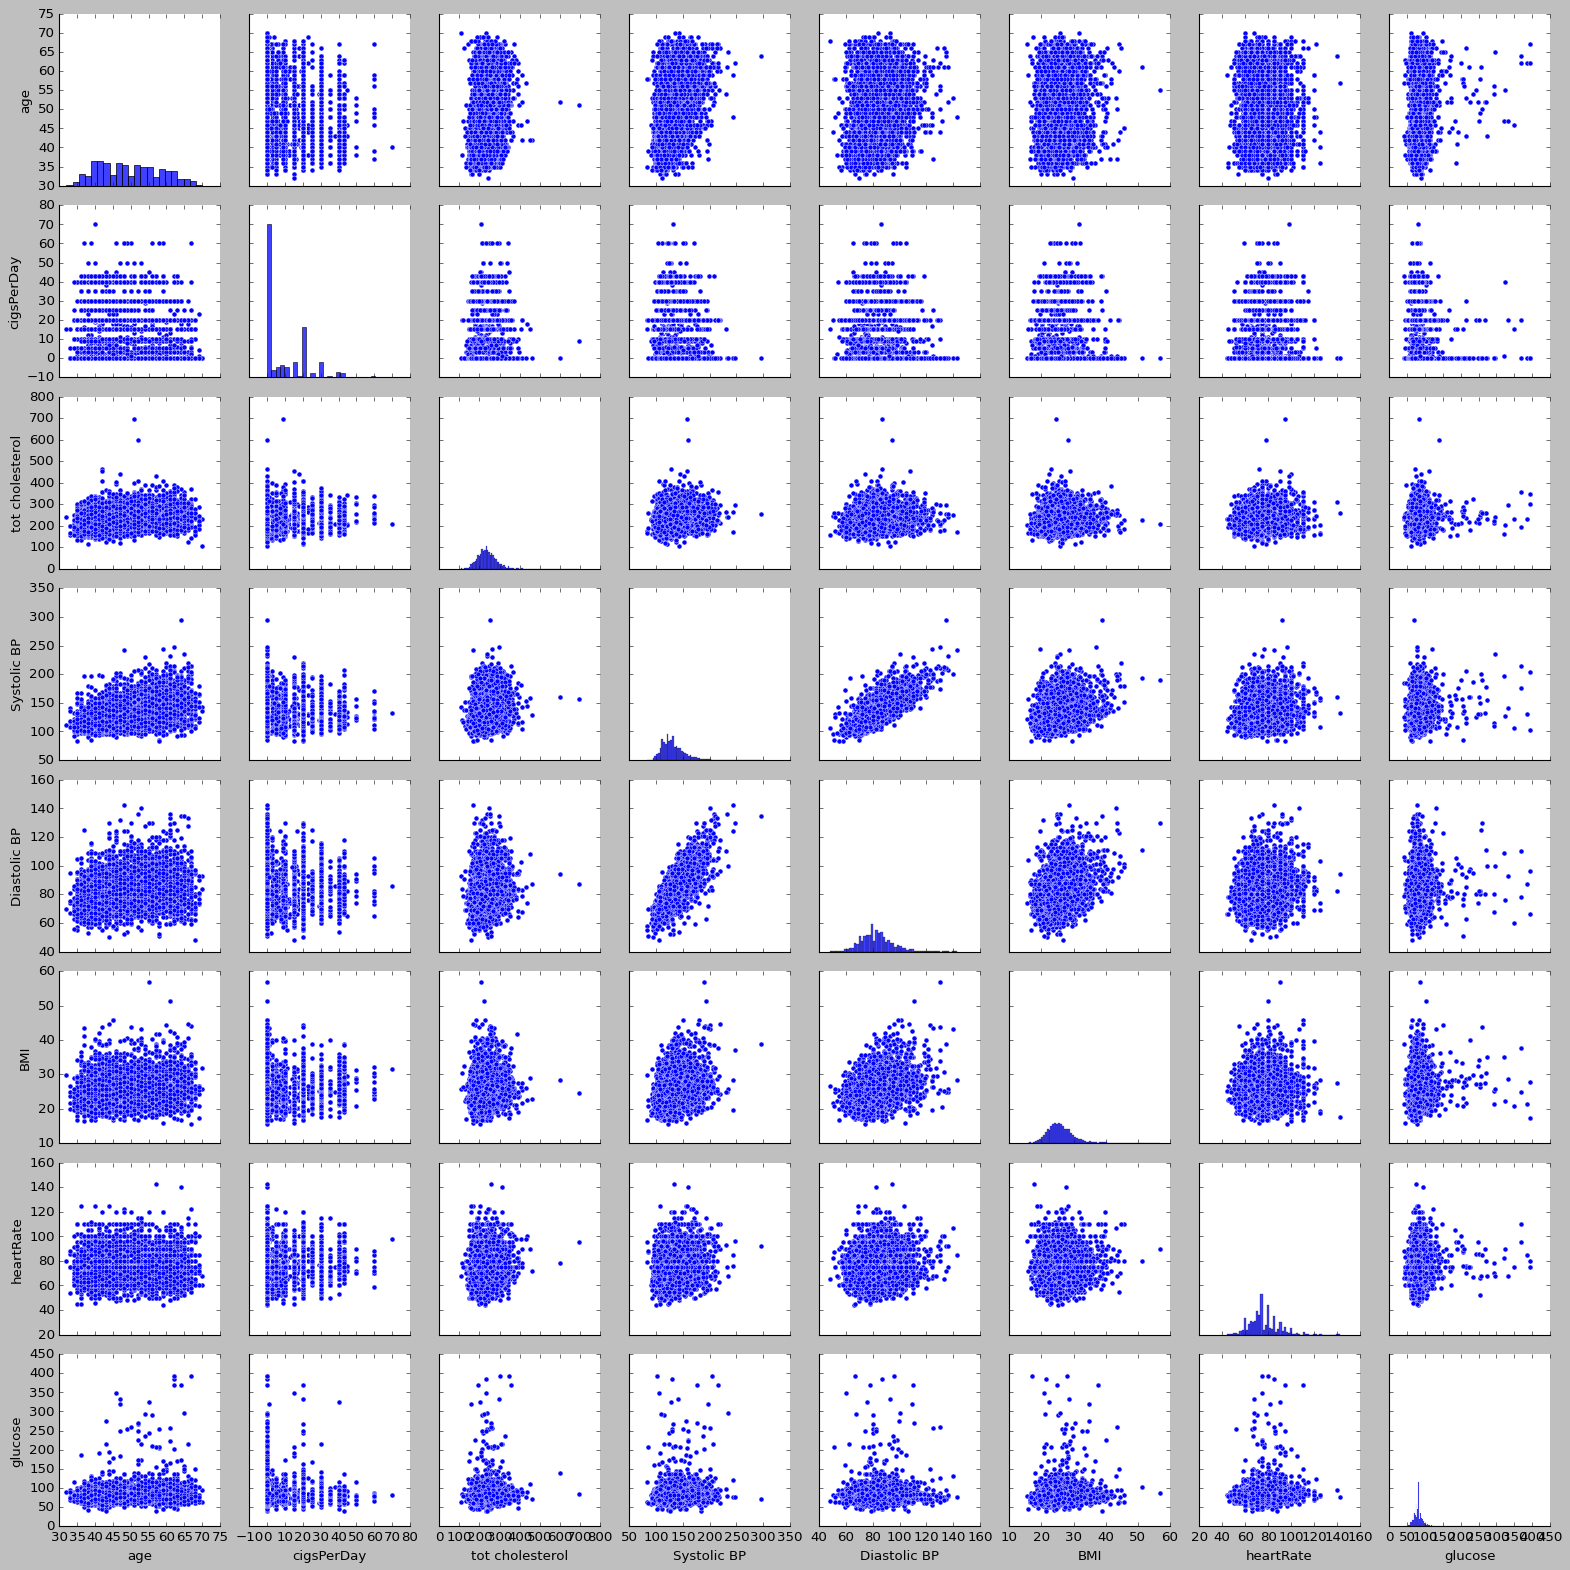

In [21]:
sns.pairplot(df[num]);

In [22]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
df['Gender']=df['Gender'].replace(to_replace=['Male','Female'],value=[1,0])

In [24]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


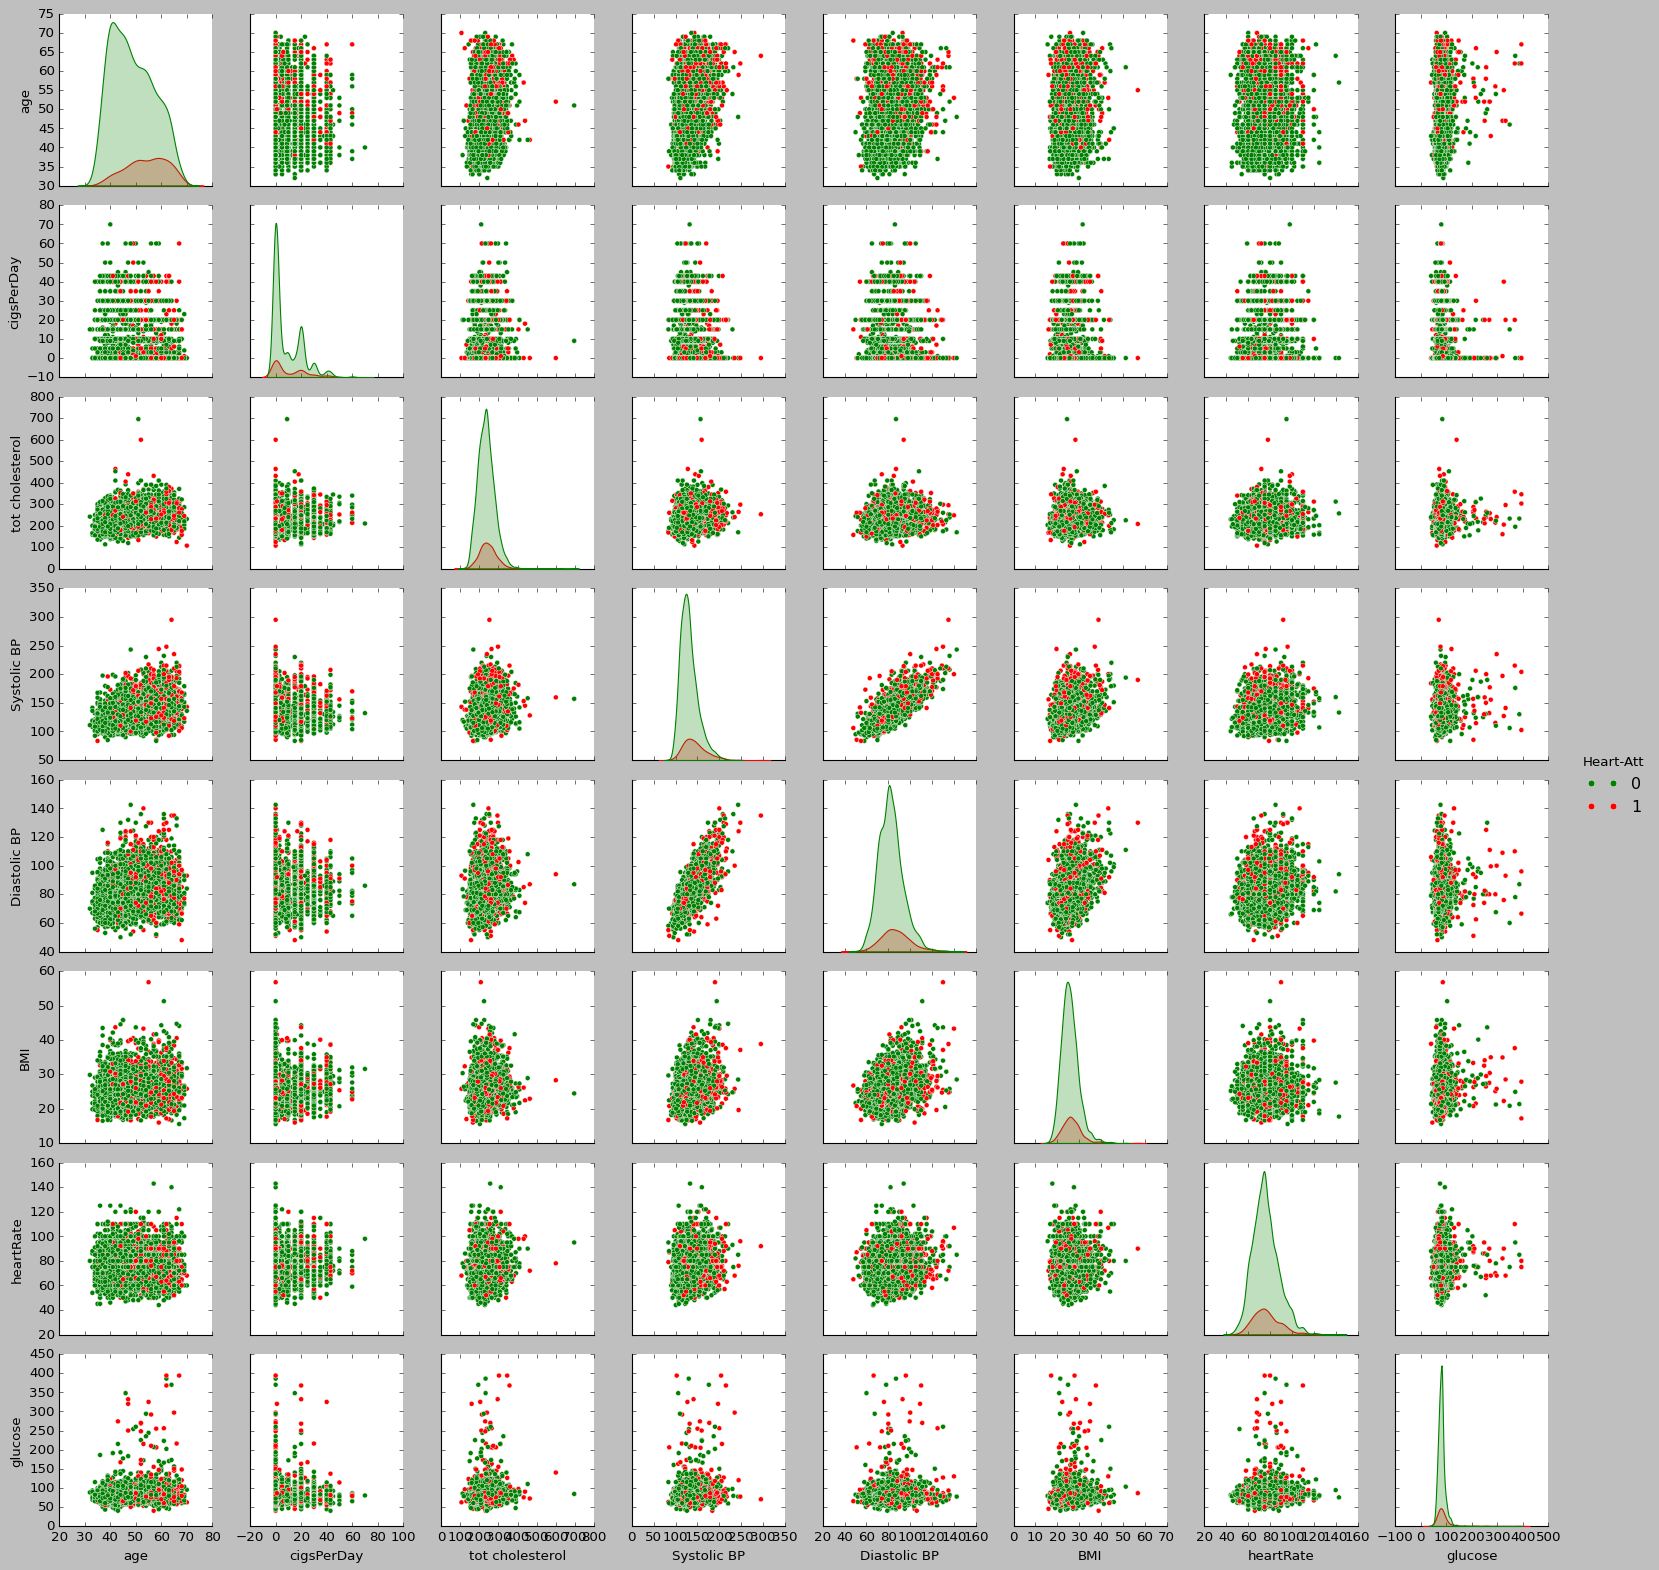

In [25]:
sns.pairplot(df[['age','cigsPerDay','tot cholesterol','Systolic BP','Diastolic BP','BMI','heartRate','glucose','Heart-Att']],
             hue= 'Heart-Att',
              palette= ['Green','Red'])

In [27]:
data=df.copy()

In [31]:
df.drop(['diabetes','currentSmoker','Diastolic BP'],axis=1,inplace=True);

In [32]:
df.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose,Heart-Att
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0


In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df[num].columns: 
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])
    
    


KeyError: "['Diastolic BP'] not in index"

<Axes: >

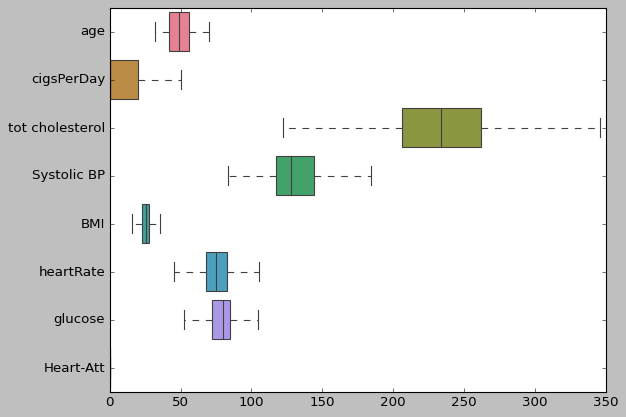

In [36]:
sns.boxplot(df,orient='h')

Test-Train Split

In [40]:
x=df.drop('Heart-Att',axis=1)
y=df['Heart-Att']

In [47]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Heart-Att, dtype: float64

In [42]:
x.head()

,Gender,age,education,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,tot cholesterol,Systolic BP,BMI,heartRate,glucose
0,1,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,225.0,150.0,28.58,65.0,103.0
4,0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [60]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)


TypeError: float() argument must be a string or a real number, not 'method'

Model Evalution

In [53]:
y_train_predict=model.predict(x_train)

TypeError: float() argument must be a string or a real number, not 'method'